<a href="https://colab.research.google.com/github/aditeyabaral/Bengaluru-International-Airport/blob/master/Weekly%20Assignments%20-%20Answers/Week_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing Libraries and Files

## Loading files and functions

In [0]:
!unzip News.zip

Archive:  News.zip
replace News/1.txt? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: News/1.txt              
  inflating: News/10.txt             
  inflating: News/100.txt            
  inflating: News/1000.txt           
  inflating: News/1001.txt           
  inflating: News/1002.txt           
  inflating: News/1003.txt           
  inflating: News/1004.txt           
  inflating: News/1005.txt           
  inflating: News/1006.txt           
  inflating: News/1007.txt           
  inflating: News/1008.txt           
  inflating: News/1009.txt           
  inflating: News/101.txt            
  inflating: News/1010.txt           
  inflating: News/1011.txt           
  inflating: News/1012.txt           
  inflating: News/1013.txt           
  inflating: News/1014.txt           
  inflating: News/1015.txt           
  inflating: News/1016.txt           
  inflating: News/1017.txt           
  inflating: News/1018.txt           
  inflating: News/1019.txt           
  inflati

In [0]:
import os
f = [open(r"News/"+i, encoding = 'utf-8') for i in os.listdir(r"News/")]
documents = []
for i in range(len(f)):
  try:
    documents.append(f[i].read())
  except:
    print("Extraction of",f[i],"failed.")

## Importing packages

In [0]:
%%time
import nltk
nltk.download("all")
import TextPreprocessing
from nltk.tokenize import word_tokenize, sent_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD, NMF, PCA
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import umap
import scipy.cluster.hierarchy as sch
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.model_selection import GridSearchCV
from yellowbrick.cluster import KElbowVisualizer
from sklearn.neighbors import NearestNeighbors
from sklearn.metrics import silhouette_score, make_scorer
import gensim.downloader as api
from gensim.models import Word2Vec
import logging

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping corpora/biocreative_ppi.zip.
[nltk_data]    | Downloading package brown to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/brown.zip.
[nltk_data]    | Downloading package brown_tei to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/brown_tei.zip.
[nltk_data]    | Downloading package cess_cat to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/cess_cat.zip.
[nltk_data]    | Downloading package cess_esp to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/cess_esp.zip.
[nltk_data]    | Downloading package chat80 to /root/nltk_data...
[nltk_data]    |   Unzipp

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


CPU times: user 23.5 s, sys: 7.7 s, total: 31.1 s
Wall time: 1min 10s


## Creating Vector Space

In [0]:
%%time
cleaned_documents = list(map(TextPreprocessing.clean,documents))
vectorizer = TfidfVectorizer(smooth_idf = True)
X = vectorizer.fit_transform(cleaned_documents).toarray()
print(X.shape)

(2224, 23867)
CPU times: user 16.9 s, sys: 238 ms, total: 17.2 s
Wall time: 17.2 s


# Question 1
You have recently been hired at an upcoming news agency as a Machine Learning engineer and they require your help. They have provided you with a zip file (News.zip) which contains over 2000 news articles across various topics like sports, politics, business etc. However, you have not been provided with the number of topics since the agency never kept a track. They need you to effectively find out the various domains of news so they can segment their news articles into the underlying topics and create separate archives for the different categories. They also want you to -

* Find out the top 5 relevant terms in each category so they can use these to quickly segment other documents 
* Obtain a mapping of which document belongs to which topic 


## Visualizing Clusters - 5 topics

### UMAP - 5 clusters

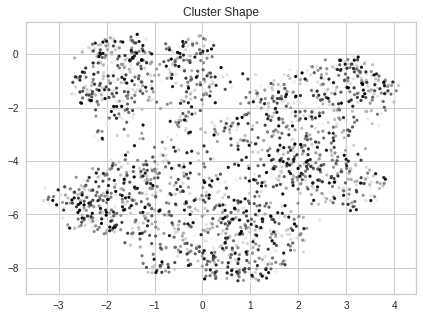

CPU times: user 2min 9s, sys: 512 ms, total: 2min 10s
Wall time: 2min 9s


In [0]:
%%time
embedding = umap.UMAP(n_neighbors=200, min_dist=0.5, random_state=12, metric = "cosine").fit_transform(X)
plt.figure(figsize=(7,5))
plt.title("Cluster Shape")
scatter = plt.scatter(embedding[:, 0], embedding[:, 1], c = [(i+1) for i in range(len(X))],s = 10, edgecolor='none')
plt.show()

### KMeans - 6 clusters

#### Manually finding WCSS and Silhouette Score

##### WCSS

In [0]:
%%time
max_k = 10
sil_scores = []
wcss = []
for k in range(2,max_k+1):
    model = KMeans(n_clusters=k,n_jobs=-1,init='k-means++', max_iter=300, n_init=10, random_state=0)
    model.fit(X)
    sil_scores.append(silhouette_score(X,model.labels_,metric='cosine'))
    wcss.append(model.inertia_)

CPU times: user 1min 11s, sys: 5.87 s, total: 1min 17s
Wall time: 12min


Text(0.5, 1.0, 'K vs WCSS')

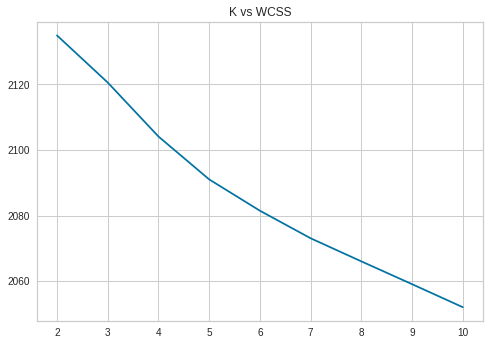

In [0]:
plt.plot([i for i in range(2,max_k+1)],wcss)
plt.title("K vs WCSS")

##### Silhouette Score

Text(0.5, 1.0, 'K vs Silhouette Scores')

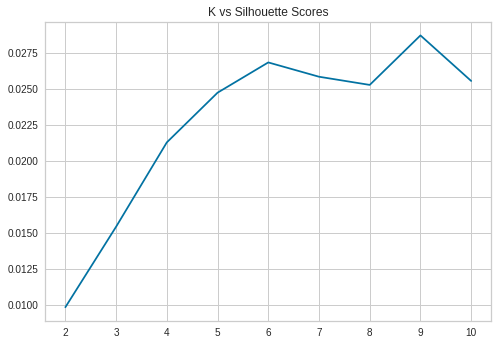

In [0]:
plt.plot([i for i in range(2,max_k+1)],sil_scores)
plt.title("K vs Silhouette Scores")

#### Using libraries to find WCSS and Silhouette Scores

##### WCSS

In [0]:
'''%%time
model = KMeans(n_jobs=-1,init='k-means++', max_iter=300, n_init=10, random_state=0)
visualizer = KElbowVisualizer(model, k=(2,10))        
visualizer.fit(X)'''    

"%%time\nmodel = KMeans(n_jobs=-1,init='k-means++', max_iter=300, n_init=10, random_state=0)\nvisualizer = KElbowVisualizer(model, k=(2,10))        \nvisualizer.fit(X)"

##### Silhouette Score

In [0]:
'''%%time
model = KMeans(n_jobs=-1,init='k-means++', max_iter=300, n_init=10, random_state=0)
visualizer = KElbowVisualizer(model, k=(2,10), metric = 'silhouette')
visualizer.fit(X)'''

"%%time\nmodel = KMeans(n_jobs=-1,init='k-means++', max_iter=300, n_init=10, random_state=0)\nvisualizer = KElbowVisualizer(model, k=(2,10), metric = 'silhouette')\nvisualizer.fit(X)"

### Hierarchical Clustering - 6 clusters

CPU times: user 1min 1s, sys: 35.4 ms, total: 1min 1s
Wall time: 1min 1s


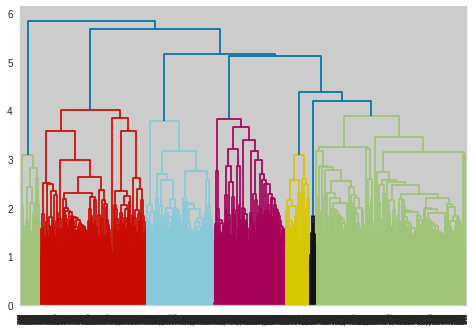

In [0]:
%%time
dendrogram = sch.dendrogram(sch.linkage(X,method = "ward"))

### DBSCAN - 6 clusters

#### Finding Epsilon: [0.5, 1] - 0.8 best curve

CPU times: user 4min 40s, sys: 31.5 ms, total: 4min 40s
Wall time: 4min 41s


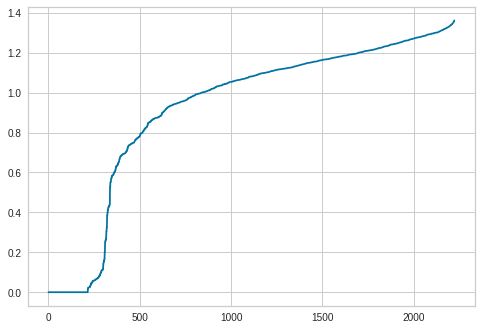

In [0]:
%%time
neigh = NearestNeighbors(n_neighbors=5)
nbrs = neigh.fit(X)
distances, indices = nbrs.kneighbors(X)
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)

#### Manually: eps = 0.8, min_samples = 23, 6 clusters

In [0]:
%%time
Points = 50
sil_scores = []
clusters = []
samples = []
for minPts in range(3,Points+1):
    print(minPts, end = " ")
    samples.append(minPts)
    model = DBSCAN(eps = 0.8, min_samples = minPts, metric = "cosine", n_jobs = -1)
    model.fit(X)
    classes = model.labels_
    clusters.append(len(set(classes[classes!=-1])))
    if clusters[-1] < 2:
      sil_scores.append(-1)
    else:
      sil_scores.append(silhouette_score(X,model.labels_,metric='cosine'))

3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 CPU times: user 18min 8s, sys: 30.5 s, total: 18min 39s
Wall time: 9min 38s


In [0]:
max_index = sil_scores.index(max(sil_scores))
clusters[max_index], samples[max_index]

(6, 25)

Text(0.5, 1.0, 'MinPts vs Silhouette Scores')

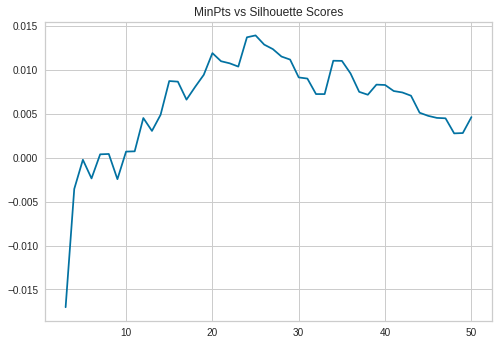

In [0]:
plt.plot(samples,sil_scores)
plt.title("MinPts vs Silhouette Scores")

#### GridSearch: eps = 0.7, min_samples = 5, 42 clusters

In [0]:
'''%%time
model = DBSCAN(metric = "cosine", n_jobs = -1)
parameters = {"eps":[0.6,0.7,0.8], "min_samples":list(range(5,40))}

def scorer(model, X):
  classes = model.labels_
  if len(set(classes)) < 2:
    return -1
  return silhouette_score(X,model.labels_, metric = "cosine")

grid = GridSearchCV(estimator=model,param_grid=parameters,scoring=scorer,cv=[(slice(None), slice(None))],n_jobs=-1)
grid.fit(X)'''

'%%time\nmodel = DBSCAN(metric = "cosine", n_jobs = -1)\nparameters = {"eps":[0.6,0.7,0.8], "min_samples":list(range(5,40))}\n\ndef scorer(model, X):\n  classes = model.labels_\n  if len(set(classes)) < 2:\n    return -1\n  return silhouette_score(X,model.labels_, metric = "cosine")\n\ngrid = GridSearchCV(estimator=model,param_grid=parameters,scoring=scorer,cv=[(slice(None), slice(None))],n_jobs=-1)\ngrid.fit(X)'

In [0]:
#grid.best_params_

In [0]:
'''%%time
dbscan = DBSCAN(eps = 0.7, min_samples = 5, metric = "cosine",n_jobs = -1)
dbscan.fit(X)
classes = dbscan.labels_
print(len(set(classes[classes!=-1])))'''

'%%time\ndbscan = DBSCAN(eps = 0.7, min_samples = 5, metric = "cosine",n_jobs = -1)\ndbscan.fit(X)\nclasses = dbscan.labels_\nprint(len(set(classes[classes!=-1])))'

## Finding Topics

In [0]:
k = 5
classes = ["Topic {}".format(i+1) for i in range(k)]

def LSA(k, X):
    vectorizer = TfidfVectorizer(smooth_idf=True)
    X_transformed = vectorizer.fit_transform(X)
    svd = TruncatedSVD(n_components=k, algorithm='randomized', n_iter=500, random_state=122)
    lsa = svd.fit_transform(X_transformed) 
    document_topic_matrix = pd.DataFrame(lsa,columns=classes, index = X)
    dic = vectorizer.get_feature_names()
    term_topic_matrix = pd.DataFrame(svd.components_, index = classes, columns = (dic)).T
    return lsa, document_topic_matrix, term_topic_matrix

def NMFFunction(k, X):
    vectorizer = TfidfVectorizer(smooth_idf=True)
    X_transformed = vectorizer.fit_transform(X)
    model = NMF(n_components=k, random_state=122, init='nndsvd', max_iter = 500)
    topicmodel = model.fit_transform(X_transformed) 
    document_topic_matrix = pd.DataFrame(topicmodel,columns=classes, index = X)
    dic = vectorizer.get_feature_names()
    term_topic_matrix = pd.DataFrame(model.components_, index = classes, columns = (dic)).T
    return topicmodel, document_topic_matrix, term_topic_matrix

In [0]:
%%time
lsa, document_topic_matrix_lsa, term_topic_matrix_lsa = LSA(k, cleaned_documents) 
nmf, document_topic_matrix_nmf, term_topic_matrix_nmf = NMFFunction(k, cleaned_documents)

CPU times: user 15.7 s, sys: 10.7 s, total: 26.4 s
Wall time: 13.8 s


## Obtaining top 10 Terms per Topic

In [0]:
%%time
top_10_lsa = dict()
top_10_nmf = dict()

for topic in term_topic_matrix_lsa.columns:

  top_10_lsa[topic] = list()
  top_10_nmf[topic] = list()

  term_topic_matrix_lsa.sort_values(by = topic, inplace = True, ascending = False)
  term_topic_matrix_nmf.sort_values(by = topic, inplace = True, ascending = False)

  for i in range(10):
    top_10_lsa[topic].append(term_topic_matrix_lsa.index[i])
    top_10_nmf[topic].append(term_topic_matrix_nmf.index[i])

top10_term_topic_df_lsa = pd.DataFrame()
top10_term_topic_df_nmf = pd.DataFrame()

for i in top_10_lsa:
  top10_term_topic_df_lsa[i] = top_10_lsa[i]
  top10_term_topic_df_nmf[i] = top_10_nmf[i]

CPU times: user 55.2 ms, sys: 19.9 ms, total: 75.1 ms
Wall time: 59.3 ms


In [0]:
top10_term_topic_df_lsa

,Topic 1,Topic 2,Topic 3,Topic 4,Topic 5
0,said,mr,win,film,economi
1,mr,labour,england,award,growth
2,would,elect,play,best,rate
3,year,blair,best,oscar,bank
4,peopl,parti,film,nomin,econom
5,game,tori,award,actor,dollar
6,labour,brown,game,star,us
7,us,tax,nt,actress,price
8,elect,minist,labour,music,rise
9,govern,howard,wale,festiv,oil


In [0]:
top10_term_topic_df_nmf

,Topic 1,Topic 2,Topic 3,Topic 4,Topic 5
0,game,mr,mobil,film,growth
1,england,labour,phone,award,economi
2,play,elect,use,best,rate
3,win,blair,peopl,oscar,bank
4,player,parti,technolog,star,us
5,nt,tori,music,nomin,said
6,wale,brown,servic,actor,price
7,match,said,user,actress,year
8,team,tax,said,festiv,econom
9,said,would,digit,director,market


## Obtaining Document Classification

In [0]:
%%time
document_class = pd.DataFrame()
document_class["Document"] = document_topic_matrix_lsa.index

t1 = document_topic_matrix_lsa[classes]
t1.reset_index(inplace = True)
t1.drop(columns = "index",inplace=True)
  

t2 = document_topic_matrix_nmf[classes]
t2.reset_index(inplace = True)
t2.drop(columns = "index",inplace=True)

document_class["LSA"] = t1.idxmax(axis = 1)
document_class["LSA"] = document_class["LSA"].apply(lambda x: int(x.split()[1]))
document_class["NMF"] = t1.idxmax(axis = 1)
document_class["NMF"] = document_class["NMF"].apply(lambda x: int(x.split()[1]))

CPU times: user 17.6 ms, sys: 1.93 ms, total: 19.5 ms
Wall time: 19.2 ms


In [0]:
document_class.head(10)

,Document,LSA,NMF
0,jackson film absolut disast pr expert told mic...,1,1
1,us retail sale surg decemb us retail sale end ...,5,5
2,elect deal falter heath role tori fail hold on...,1,1
3,qanta see profit fli record australian airlin ...,1,1
4,pole play gameboy blippop group artist poland ...,1,1
5,edu describ tunnel fraca arsenal edu lift lid ...,1,1
6,ruddock back yapp credenti wale coach mike rud...,1,1
7,india deccan get plane air deccan sign deal ac...,1,1
8,pixi take read leed pixi foo fighter iron maid...,1,1
9,taylor pois scotland return simon taylor name ...,1,1


In [0]:
matches = sum(document_class["LSA"]==document_class["NMF"])
matches

2224

(array([1848.,    0.,   59.,    0.,    0.,   74.,    0.,  141.,    0.,
         102.]),
 array([1. , 1.4, 1.8, 2.2, 2.6, 3. , 3.4, 3.8, 4.2, 4.6, 5. ]),
 <a list of 10 Patch objects>)

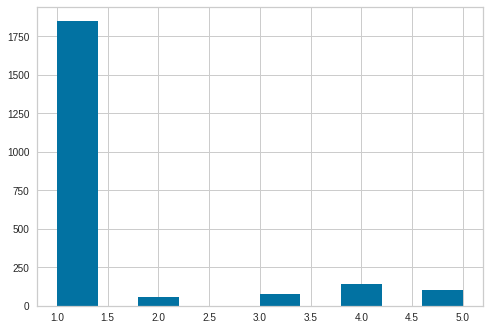

In [0]:
plt.hist(document_class["LSA"])

## Visualizing Topics

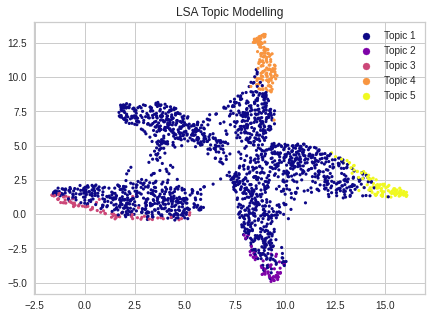

In [0]:
embedding = umap.UMAP(n_neighbors=150, min_dist=0.5, random_state=12).fit_transform(lsa)
plt.figure(figsize=(7,5))
plt.title("LSA Topic Modelling")
scatter = plt.scatter(embedding[:, 0], embedding[:, 1],s = 10, c= document_class["LSA"], edgecolor='none',cmap='plasma')
plt.legend(handles=scatter.legend_elements()[0],labels = classes)
plt.show()

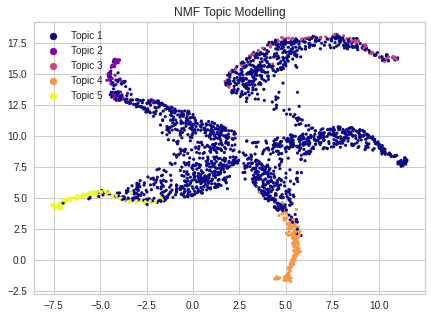

In [0]:
embedding = umap.UMAP(n_neighbors=150, min_dist=0.5, random_state=12).fit_transform(nmf)
plt.figure(figsize=(7,5))
plt.title("NMF Topic Modelling")
scatter = plt.scatter(embedding[:, 0], embedding[:, 1],s = 10, c= document_class["NMF"], edgecolor='none',cmap='plasma')
plt.legend(handles=scatter.legend_elements()[0],labels = classes)
plt.show()

# Question 2
Your boss at the news agency was extremely impressed with your work and has assigned you to a new job – summarising these news articles for their app. Your boss needs you to develop an extractive model that can build accurate summaries and still be computationally inexpensive.

A good text summary is short and crisp and yet retains the keywords in the original document. We can hence define a summary score as -

\begin{equation*}
Summary Score = (\frac{K_{S}}{K_{D}})(\frac{S_{D}-S_{S}}{S_{D}})\
\end{equation*}


where ks is the number of keywords in the summary and kd is the number of keywords in the document. Similarly, sD and ss are the number of sentences in the document and summary, respectively. A good summary will have a smaller number of sentences in the summary and a high number of keywords, hence a summary score of 1 is perfect and 0 is undesirable. 

Your goal is to develop a model that achieves an optimal summary score within a reasonable amount of time.


## Initialsing scoring metric

In [0]:
!pip install rake-nltk
from rake_nltk import Rake 
r = Rake()

def summary_score(summary, document):
  ss = len(sent_tokenize(summary))
  sd = len(sent_tokenize(document))

  kw = r.extract_keywords_from_text(summary)
  ks = len(r.get_ranked_phrases())

  kw = r.extract_keywords_from_text(document)
  kd = len(r.get_ranked_phrases())

  return (ks/kd)*((sd-ss)/sd)

  Created wheel for rake-nltk: filename=rake_nltk-1.0.4-py2.py3-none-any.whl size=7819 sha256=caa5f690835e02791cb559e20d716a195882a8f120def0af38f64b3caceeef6e
  Stored in directory: /root/.cache/pip/wheels/ef/92/fc/271b3709e71a96ffe934b27818946b795ac6b9b8ff8682483f
Successfully built rake-nltk


## TFIDF Summarization

### Declaring Functions

In [0]:
def TFIDF_avg_summary(document):
  sentences = sent_tokenize(document)
  clean_sentences = list(map(TextPreprocessing.clean, sentences))
  vectorizer = TfidfVectorizer(smooth_idf = True)
  X = vectorizer.fit_transform(clean_sentences).toarray()

  sentence_scores = [(pos,sum(vector)) for pos, vector in enumerate(X)]
  sent_sum = 0
  for pair in sentence_scores:
    sent_sum+= pair[1]
  avg = sent_sum/X.shape[0]

  top_sentences = [i for i in sentence_scores if i[1]>avg]
  top_sentences.sort(key = lambda x: x[0])
  summary = [sentences[pair[0]] for pair in top_sentences]
  return " ".join(summary)

def TFIDF_k_summary(k, document):
  sentences = sent_tokenize(document)
  clean_sentences = list(map(TextPreprocessing.clean, sentences))
  vectorizer = TfidfVectorizer(smooth_idf = True)
  X = vectorizer.fit_transform(clean_sentences).toarray()

  sentence_scores = [(pos,sum(vector)) for pos, vector in enumerate(X)]
  sentence_scores.sort(key = lambda x: x[1], reverse = True)
  topk_sentences = sentence_scores[:k]

  topk_sentences.sort(key = lambda x: x[0])
  summary = [sentences[pair[0]] for pair in topk_sentences]
  return " ".join(summary)

### Summarizing with TFIDF

#### Average Based

In [0]:
%%time
summaries_tfidf_avg = [TFIDF_avg_summary(doc) for doc in documents]
summary_scores_tfidf_avg = np.array([summary_score(summaries_tfidf_avg[i],documents[i]) for i in range(len(documents))], dtype = 'float')

CPU times: user 36.5 s, sys: 31.1 ms, total: 36.5 s
Wall time: 36.5 s


Text(0.5, 1.0, 'Document Size vs TF-IDF-Avg Summary Score')

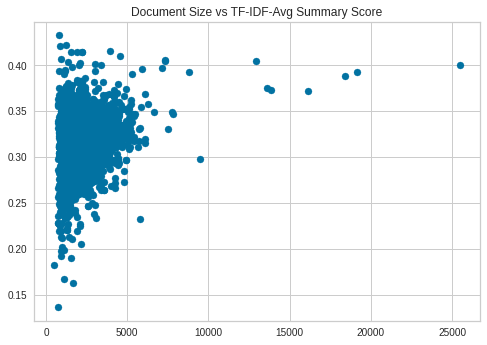

In [0]:
plt.scatter(list(map(len,documents)),summary_scores_tfidf_avg)
plt.title("Document Size vs TF-IDF-Avg Summary Score")

#### K-Proportion Based - 0.45

In [0]:
%%time
max_k = 0.95
k_values = []
kprop_means = []
for k in np.arange(0.05,max_k+0.05,0.05):
  k_values.append(k)
  summaries_tfidf_kprop = [TFIDF_k_summary(int(k*len(sent_tokenize(doc))), doc) for doc in documents]
  summary_scores_tfidf_kprop = np.array([summary_score(summaries_tfidf_kprop[i],documents[i]) for i in range(len(documents))], dtype = 'float')
  kprop_means.append(summary_scores_tfidf_kprop.mean())

CPU times: user 11min 41s, sys: 186 ms, total: 11min 41s
Wall time: 11min 41s


Text(0.5, 1.0, 'K vs K-Proportion Summary Scores')

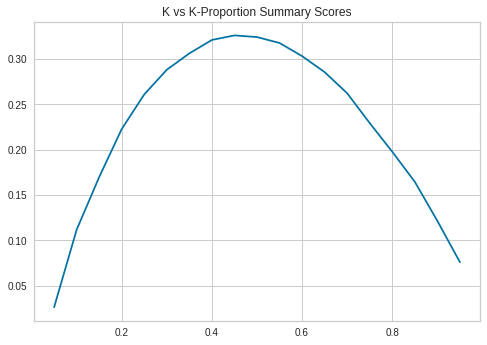

In [0]:
plt.plot(k_values,kprop_means)
plt.title("K vs K-Proportion Summary Scores")

In [0]:
k_values[kprop_means.index(max(kprop_means))]

0.45

In [0]:
%%time
k = 0.45
summaries_tfidf_kprop = [TFIDF_k_summary(int(k*len(sent_tokenize(doc))), doc) for doc in documents]
summary_scores_tfidf_kprop = np.array([summary_score(summaries_tfidf_kprop[i],documents[i]) for i in range(len(documents))], dtype = 'float')

CPU times: user 36.6 s, sys: 6.61 ms, total: 36.6 s
Wall time: 36.6 s


Text(0.5, 1.0, 'Document Size vs TF-IDF-K-Proportion Summary Score')

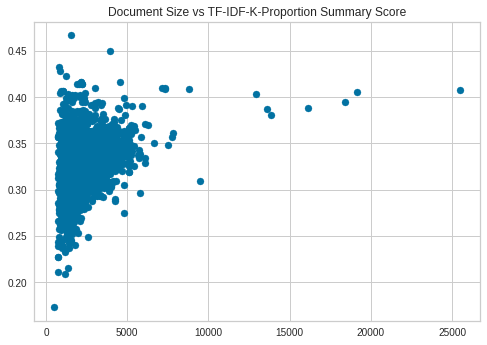

In [0]:
plt.scatter(list(map(len,documents)),summary_scores_tfidf_kprop)
plt.title("Document Size vs TF-IDF-K-Proportion Summary Score")

#### K-Sentence Based - 6

In [0]:
%%time
max_k = 50 #max(list(map(len,list(map(sent_tokenize,documents))))) - takes 3 hours
k_values = []
ksent_means = []
for k in np.arange(2,max_k+1):
  k_values.append(k)
  summaries_tfidf_ksent = [TFIDF_k_summary(k, doc) for doc in documents]
  summary_scores_tfidf_ksent = np.array([summary_score(summaries_tfidf_ksent[i],documents[i]) for i in range(len(documents))], dtype = 'float')
  ksent_means.append(summary_scores_tfidf_ksent.mean())

CPU times: user 30min 11s, sys: 412 ms, total: 30min 11s
Wall time: 30min 12s


Text(0.5, 1.0, 'K vs K-Sentences Summary Scores')

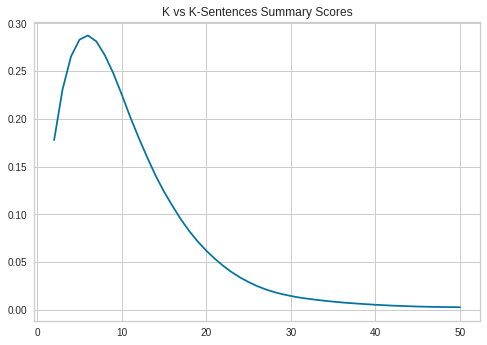

In [0]:
plt.plot(k_values,ksent_means)
plt.title("K vs K-Sentences Summary Scores")

In [0]:
k_values[ksent_means.index(max(ksent_means))]

6

In [0]:
%%time
k = 6
summaries_tfidf_ksent = [TFIDF_k_summary(k, doc) for doc in documents]
summary_scores_tfidf_ksent = np.array([summary_score(summaries_tfidf_ksent[i],documents[i]) for i in range(len(documents))], dtype = 'float')

CPU times: user 35.1 s, sys: 5.16 ms, total: 35.1 s
Wall time: 35.2 s


Text(0.5, 1.0, 'Document Size vs TF-IDF-K-Sentences Summary Score')

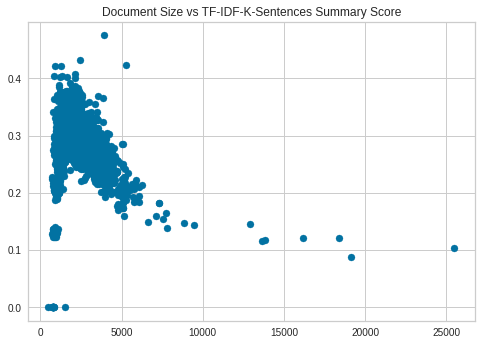

In [0]:
plt.scatter(list(map(len,documents)),summary_scores_tfidf_ksent)
plt.title("Document Size vs TF-IDF-K-Sentences Summary Score")

### TFIDF Results

In [0]:
print("Average Score using Average Method:", summary_scores_tfidf_avg.mean())
print("Average Score using K-Proportion Method:", summary_scores_tfidf_kprop.mean())
print("Average Score using K-Sentences Method:", summary_scores_tfidf_ksent.mean())

Average Score using Average Method: 0.313382093842629
Average Score using K-Proportion Method: 0.32590807387050913
Average Score using K-Sentences Method: 0.28731298323409665


## LSA Summarization

### Declaring Functions

In [0]:
def LSAsummarize(k, document):
    X = sent_tokenize(document)
    X_clean = list(map(TextPreprocessing.clean, X))
    vectorizer = TfidfVectorizer(smooth_idf=True)
    X_transformed = vectorizer.fit_transform(X_clean)
    feature_count = len(vectorizer.get_feature_names())
    if k>feature_count:
        k = feature_count-1
    svd = TruncatedSVD(n_components=k, algorithm='randomized', n_iter=10, random_state=122)
    lsa = svd.fit_transform(X_transformed)
    Sigma = svd.singular_values_
    column_names = ["Topic {}".format(str(i+1)) for i in range(lsa.shape[1])]
    document_topic_matrix = pd.DataFrame(lsa,columns=column_names)
    document_topic_matrix["Document"] = X
    document_topic_matrix["Position"] = [i for i in range(len(X))]
    dic = vectorizer.get_feature_names()
    term_topic_matrix = pd.DataFrame(svd.components_, index = column_names, columns = (dic)).T

    agg = sum(Sigma)
    percentage_topic = (Sigma/agg)*len(X)
    sigma = percentage_topic.astype(int)

    summary = []
    column_names = ["Topic {}".format(str(i+1)) for i in range(len(sigma))]
    for i in range(len(column_names)):
        num_sent = sigma[i]
        topic = column_names[i]
        document_topic_matrix.sort_values(by = topic,inplace=True,ascending = False)
        
        document_topic_matrix.reset_index(inplace=True)
        document_topic_matrix.drop(columns = ["index"],inplace=True)
        j = 0
        ctr = 0
        while ctr != num_sent:
            item = (document_topic_matrix["Document"][j],document_topic_matrix["Position"][j])
            if item not in summary:
                summary.append(item)
                ctr+=1
            j+=1
    summary.sort(key = lambda x: x[1])
    sent = [i[0] for i in summary]
    return " ".join(sent)

### Finding best K for all documents

In [0]:
%%time
max_k = 30
k_values = []
ktopics_means = []
for k in range(2,max_k+1):
  k_values.append(k)
  print(k,end=" ")
  summaries_LSA = [LSAsummarize(k,doc) for doc in documents]
  summary_scores_LSA = np.array([summary_score(summaries_LSA[i],documents[i]) for i in range(len(documents))], dtype = "float")
  ktopics_means.append(summary_scores_LSA.mean())

2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 CPU times: user 1h 27min 44s, sys: 59min 5s, total: 2h 26min 49s
Wall time: 1h 16min 30s


Text(0.5, 1.0, 'K vs K-Topics Summary Scores')

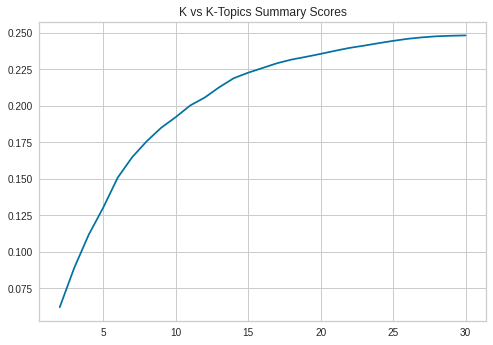

In [0]:
plt.plot(k_values,ktopics_means)
plt.title("K vs K-Topics Summary Scores")

In [0]:
k_values[ktopics_means.index(max(ktopics_means))]

30

In [0]:
%%time
k = 30
summaries_LSA = [LSAsummarize(k,doc) for doc in documents]
summary_scores_LSA = np.array([summary_score(summaries_LSA[i],documents[i]) for i in range(len(documents))], dtype = "float")

CPU times: user 3min 39s, sys: 2min 28s, total: 6min 8s
Wall time: 3min 11s


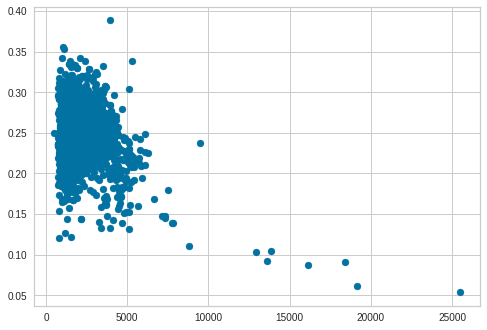

In [0]:
plt.scatter(list(map(len,documents)),summary_scores_LSA)

### Obtaining Result

In [0]:
print("Average Score using LSA:", summary_scores_LSA.mean())

Average Score using LSA: 0.24818212921823657


## Final Scores

In [0]:
df1 = pd.DataFrame()
df1["Document"] = documents
df1["TFIDF Average"] = summary_scores_tfidf_avg
df1["TFIDF K Proportion"] = summary_scores_tfidf_kprop
df1["TFIDF K Sentences"] = summary_scores_tfidf_ksent
df1["LSA"] = summary_scores_LSA

In [0]:
df1.head()

,Document,TFIDF Average,TFIDF K Proportion,TFIDF K Sentences,LSA
0,Jackson film 'absolute disaster'\n\nA PR exper...,0.323864,0.347159,0.313636,0.235227
1,US retail sales surge in December\n\nUS retail...,0.318146,0.319717,0.306363,0.240377
2,Election deal faltered over Heath role\n\nThe ...,0.293135,0.325203,0.256098,0.267389
3,Qantas sees profits fly to record\n\nAustralia...,0.290179,0.332908,0.325255,0.224490
4,Poles play with GameBoy 'blip-pop'\n\nA group ...,0.343972,0.353664,0.283688,0.204965


In [0]:
df2 = pd.DataFrame()
df2["TFIDF Average"] = [summary_scores_tfidf_avg.mean()]
df2["TFIDF K Proportion"] = [summary_scores_tfidf_kprop.mean()]
df2["TFIDF K Sentences"] = [summary_scores_tfidf_ksent.mean()]
df2["LSA"] = [summary_scores_LSA.mean()]

In [0]:
df2

,TFIDF Average,TFIDF K Proportion,TFIDF K Sentences,LSA
0,0.313382,0.325908,0.287313,0.248182


# Question 3

Your boss has obtained a bunch of buzz words (BuzzWords.txt) from the internet and now needs your
help again to cluster these sets of words into various groups so the next time the news agency posts an
article, they can use these buzz words to obtain a greater reach. However, you again do not know the
various categories from which these words have been obtained from. Your objective is to find a way
to effectively cluster these words such that every group of words belong in the same semantic space.
Your boss expects the following –
* The number of clusters k
* The words that fall under each category k

## Setting logging format and loading corpi

In [0]:
logging.basicConfig(
    format="%(asctime)s : %(levelname)s : %(message)s", level=logging.INFO
)
corpus1 = api.load('text8')
corpus2 = api.load('20-newsgroups')

2020-05-31 15:47:13,138 : INFO : Creating /root/gensim-data


[==================================================] 100.0% 31.6/31.6MB downloaded


2020-05-31 15:47:23,155 : INFO : text8 downloaded


[==================================================] 100.1% 13.8/13.8MB downloaded


2020-05-31 15:47:29,785 : INFO : 20-newsgroups downloaded


## Training the Model

In [0]:
model = Word2Vec(min_count=5, size=200, iter=10)
model.build_vocab(corpus1)
model.train(corpus1, total_examples=model.corpus_count, epochs=model.epochs)
model.build_vocab(corpus2, update=True)
model.train(corpus2, total_examples=model.corpus_count, epochs=model.epochs)

2020-05-31 15:47:51,823 : INFO : collecting all words and their counts
/usr/local/lib/python3.6/dist-packages/smart_open/smart_open_lib.py:253: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL
2020-05-31 15:47:51,832 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2020-05-31 15:47:57,581 : INFO : collected 253854 word types from a corpus of 17005207 raw words and 1701 sentences
2020-05-31 15:47:57,582 : INFO : Loading a fresh vocabulary
2020-05-31 15:47:57,893 : INFO : effective_min_count=5 retains 71290 unique words (28% of original 253854, drops 182564)
2020-05-31 15:47:57,894 : INFO : effective_min_count=5 leaves 16718844 word corpus (98% of original 17005207, drops 286363)
2020-05-31 15:47:58,137 : INFO : deleting the raw count

(50607, 753840)

## Loading the BuzzWords file

In [0]:
with open("BuzzWords.txt") as text:
    lines = [i.strip() for i in text.readlines()]

## Constructing similarity matrix

In [0]:
sim_matrix = []
for idx, i in enumerate(lines):
    sim_matrix.append([])
    for j in lines:
        try:
            sim_matrix[idx].append(model.wv.similarity(i,j)**2)
        except:
            sim_matrix[idx].append(0)

check = pd.DataFrame(sim_matrix, columns=lines, index=lines)
check

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


,food,champion,hunger,gadget,winner,wildlife,fitness,sport,greenery,healthy,chip,nature,information,dish,cuisine,trees,party,flowers,vote,election,active,serene,smart,debate,campaign,restaurant,tasty,politics,tech,computer
food,1.000000,2.222612e-02,7.116937e-02,0.000214,0.004412,0.190262,0.045395,0.042313,0.045151,1.778751e-01,2.496580e-03,0.012127,0.093067,0.164149,0.187370,1.326645e-01,0.003260,0.162408,0.002610,1.449052e-03,0.009376,0.003375,0.019040,0.001257,0.000340,7.815224e-02,0.039224,0.003936,1.734447e-02,1.181536e-02
champion,0.022226,1.000000e+00,8.483777e-03,0.011506,0.310135,0.000528,0.000023,0.135174,0.001504,3.017410e-02,3.141251e-07,0.008711,0.031208,0.001382,0.004527,3.621741e-02,0.030976,0.016050,0.021552,4.641145e-02,0.000023,0.000652,0.003861,0.000269,0.020260,1.315525e-03,0.008533,0.014932,4.977521e-08,5.152902e-06
hunger,0.071169,8.483777e-03,9.999999e-01,0.001075,0.003029,0.060230,0.058942,0.017846,0.058963,1.308885e-01,4.073153e-02,0.019241,0.005750,0.000368,0.000049,1.521760e-02,0.000381,0.067063,0.002574,1.861532e-03,0.000031,0.035196,0.017962,0.000991,0.071819,6.462147e-08,0.023623,0.003110,2.364281e-07,1.167839e-02
gadget,0.000214,1.150638e-02,1.074644e-03,1.000000,0.000026,0.002502,0.001915,0.000148,0.029192,8.080531e-04,5.895023e-02,0.014100,0.010675,0.001200,0.008202,3.989721e-04,0.030784,0.009508,0.037041,5.107386e-02,0.003225,0.033684,0.114755,0.000132,0.003748,4.250081e-02,0.027509,0.007536,3.503862e-02,5.862273e-02
winner,0.004412,3.101348e-01,3.028828e-03,0.000026,1.000000,0.002700,0.004812,0.083960,0.026747,5.116671e-03,8.375383e-03,0.015335,0.000341,0.001681,0.006508,2.712847e-02,0.048586,0.008840,0.116423,8.997730e-02,0.002186,0.007980,0.008589,0.000659,0.013767,1.407798e-03,0.000438,0.001374,2.621246e-03,2.437286e-03
wildlife,0.190262,5.283655e-04,6.023006e-02,0.002502,0.002700,1.000000,0.063064,0.078742,0.064342,1.018438e-01,4.988525e-02,0.004444,0.027432,0.059305,0.074833,1.839965e-01,0.000464,0.101744,0.001761,2.810900e-03,0.027425,0.000043,0.005561,0.001268,0.004474,4.770261e-02,0.007710,0.007328,1.987926e-02,4.799197e-03
fitness,0.045395,2.289025e-05,5.894222e-02,0.001915,0.004812,0.063064,1.000000,0.127622,0.000956,1.781222e-01,4.180263e-03,0.046875,0.038245,0.007021,0.000191,1.303604e-03,0.000587,0.001577,0.002973,1.207256e-03,0.003058,0.021059,0.014572,0.003505,0.000252,6.564201e-03,0.015067,0.029034,4.987868e-02,3.748883e-02
sport,0.042313,1.351741e-01,1.784618e-02,0.000148,0.083960,0.078742,0.127622,1.000000,0.003053,2.460642e-02,8.446541e-03,0.005477,0.000865,0.110392,0.092696,3.187855e-03,0.023617,0.000129,0.008469,1.291487e-02,0.051712,0.003470,0.008092,0.039941,0.036652,6.945680e-02,0.000238,0.034894,4.637762e-02,1.732673e-02
greenery,0.045151,1.503965e-03,5.896268e-02,0.029192,0.026747,0.064342,0.000956,0.003053,1.000000,4.792316e-02,4.462682e-05,0.004506,0.001802,0.037781,0.014727,4.811175e-02,0.011511,0.168442,0.021934,2.025303e-02,0.003012,0.064361,0.055615,0.039849,0.009218,3.683982e-02,0.111590,0.006288,1.287252e-02,1.470701e-03
healthy,0.177875,3.017410e-02,1.308885e-01,0.000808,0.005117,0.101844,0.178122,0.024606,0.047923,1.000000e+00,9.509449e-03,0.059933,0.008883,0.004522,0.013773,9.516335e-02,0.006607,0.108393,0.000084,2.111391e-02,0.070580,0.035239,0.064683,0.000028,0.027444,8.395861e-03,0.075738,0.000504,7.279911e-03,8.715426e-07


## Finding optimum K value - 8

### Silhouette Score Method

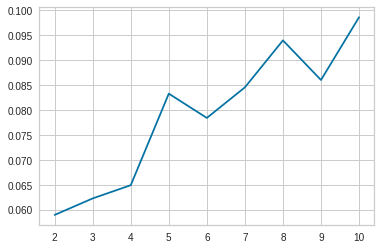

In [0]:
from sklearn.metrics import silhouette_score

sil = []
kmax = 10

for k in range(2, kmax+1):
    kmeans = KMeans(n_clusters = k).fit(sim_matrix)
    labels = kmeans.labels_
    sil.append(silhouette_score(sim_matrix, labels, metric = 'euclidean'))

plt.plot(list(range(2,kmax+1)), sil)

### UMAP

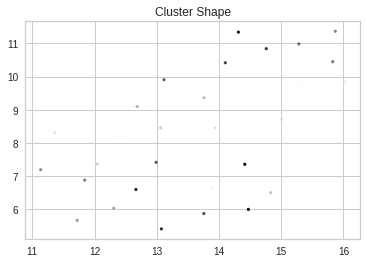

In [0]:
X = [model.wv[word] for word in lines]
embedding = umap.UMAP(n_neighbors=10, min_dist=0.5, random_state=12, metric = "cosine").fit_transform(X)  
plt.title("Cluster Shape")
plt.scatter(embedding[:, 0], embedding[:, 1], c = [(i+1) for i in range(len(sim_matrix))],s = 10, edgecolor='none')

### Dendrogram

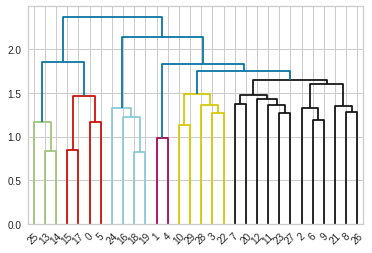

In [0]:
dendrogram = sch.dendrogram(sch.linkage(sim_matrix,method = "ward"))

## Clustering with optimum K

In [0]:
cluster = KMeans(n_clusters=8).fit(sim_matrix)
cluster.labels_

array([7, 5, 1, 3, 5, 7, 1, 5, 4, 1, 3, 1, 7, 2, 2, 4, 0, 4, 0, 0, 1, 3,
       3, 6, 6, 2, 4, 6, 3, 3], dtype=int32)

## Finding words in each topic

In [0]:
for i in range(8):
    for idx, j in enumerate(cluster.labels_):
        if j == i:
            print(lines[idx])
    print()

party
vote
election

hunger
fitness
healthy
nature
active

dish
cuisine
restaurant

gadget
chip
serene
smart
tech
computer

greenery
trees
flowers
tasty

champion
winner
sport

debate
campaign
politics

food
wildlife
information

